In [1]:
import pandas as pd
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data_path=r"mail_data.csv"
data=pd.read_csv(data_path,index_col=None);

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Category', ylabel='count'>

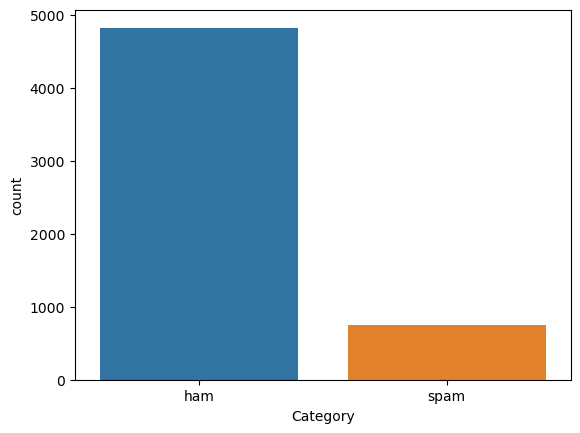

In [5]:
sns.countplot(x='Category', data=data)

In [6]:
data['Category'] = data['Category'].map({
    'ham' : 0,
    'spam' : 1
    })

In [7]:
def clean_text(Message):
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', text)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return text

In [8]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
x = data["Message"]
y = data["Category"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [11]:
def prediction(X_test, model_object):
  
    # Predicton on test with giniIndex
    y_pred = model_object.predict(xv_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [12]:
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

In [13]:
model_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 123,max_depth=10, min_samples_leaf=6)
  
# Performing training
model_gini.fit(xv_train, y_train)

# Prediction using gini
y_pred_gini = prediction(xv_test, model_gini)
cal_accuracy(y_test, y_pred_gini)

Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1201   14]
 [  54  124]]
Accuracy :  95.11844938980617


In [14]:
# Decision tree with entropy
model_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 123,
            max_depth = 10, min_samples_leaf = 6)
  
# Performing training
model_entropy.fit(xv_train, y_train)

# Prediction using entropy
y_pred_entropy = prediction(xv_test, model_entropy)
cal_accuracy(y_test, y_pred_entropy)

Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1204   11]
 [  46  132]]
Accuracy :  95.908111988514


In [16]:
input_mail = ["This is 2nd time we contact you, You have won a lottery of 40000 rupees, 2 claim is easy, just call 9966335522"]
inp_features = vectorization.transform(input_mail)
pred = model_gini.predict(inp_features)

print(pred)

[1]
